In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import random as rd

In [ ]:
def combination(n,k):
	num = 1
	den = 1
	for i in range(n-k+1,n+1):
		num *= i
	for i in range(1,k+1):
		den *= i
	return num/den

#Finite Buffer
alpha = 1.2 # 3, 1.5

    

In [ ]:
#Plotting values for 3 differrent policies
mws_plot = [0,0,0,0,0,0]
ps_plot = [0,0,0,0,0,0]
wf_plot= [0,0,0,0,0,0]
r = rd.random()
r

0.5142107614283365

In [ ]:
k = 5

In [ ]:
#k = 4

In [ ]:
#k = 3

In [ ]:
#k = 2

In [ ]:
#k = 1

In [ ]:
#k = 0

In [ ]:
# Defining Variables
#K/R values
k_total = 6

if k ==0:
  K = 5
  R = 1
if k ==1:
  K = 20
  R = 1
if k ==2:
  K = 5
  R = 4
if k ==3:
  K = 20
  R = 15
if k ==4:
  K = 50
  R = 1
if k ==5:
  K = 50
  R = 40

KR =[[5, 1], [20, 1], [5, 4], [20, 15], [50, 1], [50, 40]]
p = 0.4
N = int(2*K)
P = K/N
T_MAX = 1001
service_amp = 500



In [ ]:
service_amp

500

In [ ]:
# Buffer Size
BS =  alpha*K*p/(1-p)**2

In [ ]:
ring = int(r*(N+1))

In [ ]:
N

100

In [ ]:
ring

51

In [ ]:
#total service
S = service_amp*combination(N,ring)*(P**ring)*((1-P)**(N-ring))


In [ ]:
combination(N,ring)*(P**ring)*((1-P)**(N-ring))

0.07802866410507722

In [ ]:
S

39.01433205253861

In [ ]:
service_util = []


In [ ]:
#Intializing
service = np.zeros((K))
arrival = np.zeros((K))
delay = np.zeros((K))
T = np.zeros((K))
N_i = np.zeros((K))
Queue = []
for i in range(K):
	Queue.append([])
p_arrival = np.zeros((K))
for i in range(0, K):
	if i < R:
		p_arrival[i] = p;
	else:
		p_arrival[i] = p;

In [ ]:
# max weight scheduling
# Idea : match max queue to max capacity
# Sort queue based on length, capacity based on length


def maxweightscheduling(arrival, Queue, service, p_arrival, delay, T, K, T_MAX, N, N_i, P, service_amp, service_util, S):
  plot_p4 = []
  ser_util = 0.0
  for t in range(0, T_MAX):
    #arrival	
    #dropped packets
    drops = []
    for i in range(0, K):
      if p_arrival[i] > rd.random():
        arrival[i] += 1
        # Queue[i].append(t)
        if(len(Queue[i]) <= BS):
          Queue[i].append(t)
        else:
          drops.append(i)

    #queue sort
    qsi = []
    for i in range(K):
      qsi.append(i)
    
    for iter_num in range(len(qsi)-1,0,-1):
      for idx in range(iter_num):
        if len(Queue[qsi[idx]])<len(Queue[qsi[idx+1]]):
          temp = qsi[idx]
          qsi[idx] = qsi[idx+1]
          qsi[idx+1] = temp

    #service breakdown
    temp = S
    i = 0
    while(temp > 0 and i < K):
        ql = len(Queue[qsi[i]])
        if(temp > ql):
          service[qsi[i]] = ql
          temp -= ql
        else:
          service[qsi[i]] = temp
          temp = 0
        ser_util += service[qsi[i]]/(S*T_MAX)
        i += 1

    # Queue & Delay
    delta = 0.001
    for i in range(0, K):
      while(service[i] >= 1 and len(Queue[i]) > 0):
        ta = Queue[i][0]
        N_i[i] += 1
        delay[i] = t - ta
        T[i] = 0.9*T[i] + 0.1*delay[i]
        Queue[i].pop(0)
        if(i >= R):
          if(ta < t - 1.2*T[i]):
              p_arrival[i] = 2*p_arrival[i]/3
          else:
              p_arrival[i] = min(0.9, p_arrival[i] + delta)

      # Finite Buffer Size
      if i in drops:
        if(i >= R):
          p_arrival[i] = 2*p_arrival[i]/3

      if(len(Queue[i]) > 0):
        if(Queue[i][0] < t - 1.2*T[i]):
          p_arrival[i] = 2*p_arrival[i]/3
    
    plot_p4.append(p_arrival[K-1])

    #Reset Arrival and Service
    for i in range(K):
      arrival[i] = 0
      service[i] = 0

  service_util.append(ser_util)
  mws_plot[k] = plot_p4

In [ ]:
# processor sharing: S/K belongs to [L, L + 1), serve L packets from each of the K flows. For the remaining packets, serve once more.
def processorsharing(arrival, Queue, service, p_arrival, delay, T, K, T_MAX, N, N_i, P, service_amp, ser_util, S):
  plot_p4 = []
  ser_util = 0.0
  for t in range(0, T_MAX - 1):
    #arrival
    #Dropped packets
    drops = []
    for i in range(0, K):
      if p_arrival[i] > rd.random():
        arrival[i] += 1
        Queue[i].append(t)
        # if(len(Queue) <= BS):
        #   Queue[i].append(t)
        # else:
        #   drops.append(i)

    # Queue & Delay
    # First serve L packets from each of the K flows
    delta = 0.001
    for i in range(0, K):
      L = int(S/K);
      service[i] = L
      while(len(Queue[i]) > 0 and L > 0):
        L -= 1
        ta = Queue[i][0]
        N_i[i] += 1
        delay[i] = t - ta
        T[i] = 0.9*T[i] + 0.1*delay[i]
        Queue[i].pop(0)
        if(i >= R):
          if(ta <= t - 1.2*T[i]):
              p_arrival[i] = 2*p_arrival[i]/3
          else:
              p_arrival[i] = min(0.9, p_arrival[i] + delta)
      
      # Finite Buffer Size
      # if i in drops:
      #   if(Queue[i][0] < t - 1.2*T[i] and i >= R):
      #     p_arrival[i] = 2*p_arrival[i]/3
      
      if(len(Queue[i]) > 0):
        if(Queue[i][0] <= t - 1.2*T[i]):
          p_arrival[i] = 2*p_arrival[i]/3
    
    # we will have S - K*L additional service capacity left, we serve one packet
    # from each flow
    i = 0 # queue number
    while(i < K):
      service[i] += 1
      if(len(Queue[i]) == 0):
        i += 1
        continue
      ta = Queue[i][0]
      N_i[i] += 1
      delay[i] = t - ta
      T[i] = 0.9*T[i] + 0.1*delay[i]
      Queue[i].pop(0)
      if(i >= R):
        if(ta < t - 1.2*T[i]):
            p_arrival[i] = 2*p_arrival[i]/3
        else:
            p_arrival[i] = min(0.9, p_arrival[i] + delta)

      # Finite Buffer Size
      # if i in drops:
      #   if(Queue[i][0] < t - 1.2*T[i] and i >= R):
      #     p_arrival[i] = 2*p_arrival[i]/3
      
      if(len(Queue[i]) > 0):
        if(Queue[i][0] <= t - 1.2*T[i]):
          p_arrival[i] = 2*p_arrival[i]/3
      i += 1

    for i in range(0, K):
      ser_util += service[i]/(S*T_MAX)

    plot_p4.append(p_arrival[K-1])

    #Reset Arrival and Service
    for i in range(K):
      arrival[i] = 0
      service[i] = 0

  service_util.append(ser_util)
  ps_plot[k] = plot_p4

In [ ]:
# waterfilling: since changing min Qi doesnt make sense, max Qi - min Qi can only changed by decreasing max Qi, 
# thus we just iteratively remove from the max length queue
def waterfilling(arrival, Queue, service, p_arrival, delay, T, K, T_MAX, N, N_i, P, service_amp, service_util, S):
  plot_p4 = []
  ser_util = 0
  for t in range(0, T_MAX - 1):
      #arrival
      #Dropped Packets
      drops = []
      for i in range(0, K):
        if p_arrival[i] > rd.random():
          arrival[i] += 1
          Queue[i].append(t)
          # if(len(Queue) <= BS):
          #   Queue[i].append(t)
          # else:
          #   drops.append(i)

      #total queues length
      TQ = 0;
      for i in range(0, K):
        TQ += len(Queue[i])

      while(S > 0 and TQ > 0):
        #queue sort
        qsi = []
        for i in range(K):
          qsi.append(i)
        
        for iter_num in range(len(qsi)-1,0,-1):
          for idx in range(iter_num):
            if len(Queue[qsi[idx]])<len(Queue[qsi[idx+1]]):
              temp = qsi[idx]
              qsi[idx] = qsi[idx+1]
              qsi[idx+1] = temp

        # Queue & Delay
        # First serve L packets from each of the K flows
        delta = 0.001
        TQ -= 1
        S -= 1
        i = qsi[0]
        service[i] += 1
        ta = Queue[i][0]
        N_i[i] += 1
        delay[i] = t - ta
        T[i] = 0.9*T[i] + 0.1*delay[i]
        Queue[i].pop(0)
        if(i >= R):
          if(ta < t - 1.2*T[i]):
              p_arrival[i] = 2*p_arrival[i]/3
          else:
              p_arrival[i] = min(0.9, p_arrival[i] + delta)
        
        # Finite Buffer Size
        # if i in drops:
        #   if(Queue[i][0] < t - 1.2*T[i] and i >= R):
        #     p_arrival[i] = 2*p_arrival[i]/3
        
        if(len(Queue[i]) > 0):
          if(Queue[i][0] <= t - 1.2*T[i]):
            p_arrival[i] = 2*p_arrival[i]/3

      plot_p4.append(p_arrival[K-1])
      #Reset Arrival and Service 
      for i in range(K):
        ser_util += service[i]/(S*T_MAX)
        arrival[i] = 0
        service[i] = 0

  service_util.append(ser_util)
  wf_plot[k] = plot_p4

In [ ]:
maxweightscheduling(arrival, Queue, service, p_arrival, delay, T, K, T_MAX, N, N_i, P, service_amp, service_util, S)

In [ ]:
# Reinitializing
service = np.zeros((K))
arrival = np.zeros((K))
delay = np.zeros((K))
T = np.zeros((K))
N_i = np.zeros((K))
Queue = []
for i in range(K):
	Queue.append([])
p_arrival = np.zeros((K))
for i in range(0, K):
	if i < R:
		p_arrival[i] = p;
	else:
		p_arrival[i] = p;

In [ ]:
processorsharing(arrival, Queue, service, p_arrival, delay, T, K, T_MAX, N, N_i, P, service_amp, service_util, S)

In [ ]:
# Reinitializing
service = np.zeros((K))
arrival = np.zeros((K))
delay = np.zeros((K))
T = np.zeros((K))
N_i = np.zeros((K))
Queue = []
for i in range(K):
	Queue.append([])
p_arrival = np.zeros((K))
for i in range(0, K):
	if i < R:
		p_arrival[i] = p;
	else:
		p_arrival[i] = p;

In [ ]:
waterfilling(arrival, Queue, service, p_arrival, delay, T, K, T_MAX, N, N_i, P, service_amp, service_util, S)

In [ ]:
service_util

[0.5801807552384914, 1.2803000159721416, -0.01579517891286156]

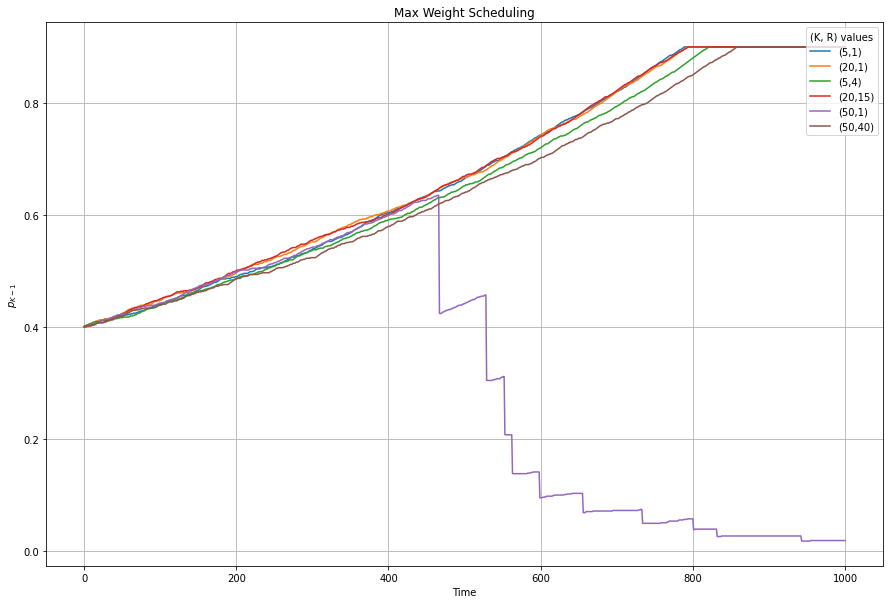

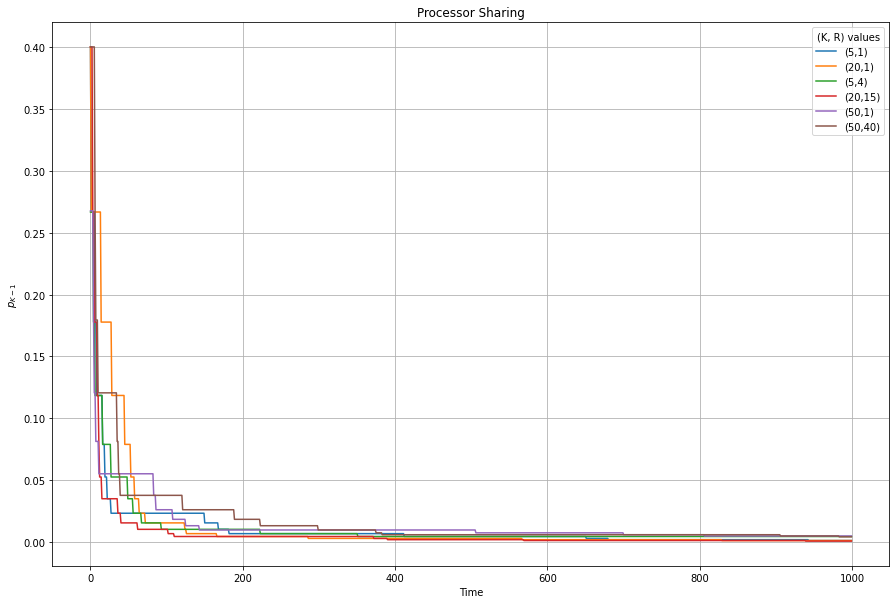

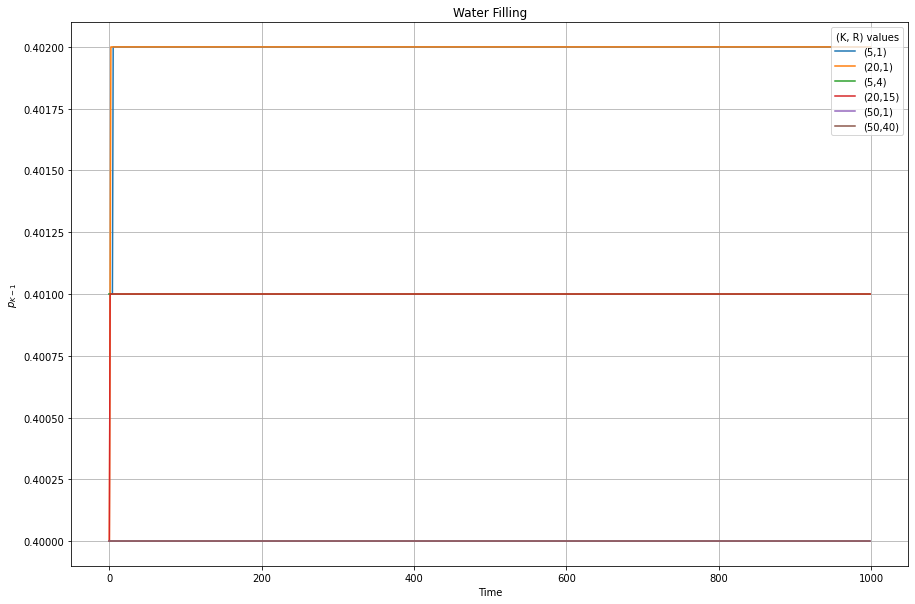

In [ ]:
 #Plots for the 3 processes with different K/R values:

# colors for different K/R values

# MWS
f1 = plt.figure(1)
plt.grid()
plt.title('Max Weight Scheduling')
f1.set_figwidth(15)
f1.set_figheight(10)

for j in range(k_total):
  lab = "(" + "% s" % KR[j][0]+ "," +  "% s" % KR[j][1] + ")"
  plt.plot(range(len(mws_plot[j])), mws_plot[j], label = lab)
  plt.xlabel("Time")
  plt.ylabel("$p_{K - 1}$")
  plt.legend(title = "(K, R) values", loc = 'upper right')


#PS
f2 = plt.figure(2)
plt.grid()
plt.title('Processor Sharing')
f2.set_figwidth(15)
f2.set_figheight(10)

for j in range(k_total):
  lab = "(" + "% s" % KR[j][0]+ "," +  "% s" % KR[j][1] + ")"
  plt.plot(range(len(ps_plot[j])), ps_plot[j], label = lab)
  plt.xlabel("Time")
  plt.ylabel("$p_{K - 1}$")
  plt.legend(title = "(K, R) values", loc = 'upper right')

#WF
f3 = plt.figure(3)
plt.grid()
plt.title('Water Filling')
f3.set_figwidth(15)
f3.set_figheight(10)

for j in range(k_total):
  lab = "(" + "% s" % KR[j][0]+ "," +  "% s" % KR[j][1] + ")"
  plt.plot(range(len(wf_plot[j])), wf_plot[j], label = lab)
  plt.xlabel("Time")
  plt.ylabel("$p_{K - 1}$")
  plt.legend(title = "(K, R) values", loc = 'upper right')


